In [20]:
import pandas as pd 
import numpy as np 
import missingno as msno
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder


In [2]:
df = pd.read_csv(r'C:\Users\LENOVO\Downloads\archive\Subscription_Dataset.csv')
df.set_index('CustomerID', inplace=True)
df.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,Churn
CustomerID,,,,,,,,,,,,,,,,,,,,
LOHRYYC9E8,42,11.321950,475.521914,Basic,Electronic check,Yes,Movies,Yes,Tablet,0.386852,24.593361,25,Comedy,3.489465,7,Female,15,No,No,0
RIH7RFEZCS,95,12.810915,1217.036887,Standard,Electronic check,Yes,TV Shows,No,Mobile,37.123000,102.860795,21,Comedy,2.251860,3,Male,8,No,NaN,0
JB5J8X2UY1,6,NaN,91.583304,Standard,Credit card,Yes,TV Shows,No,Tablet,30.716944,10.512415,29,Fantasy,NaN,4,Male,14,No,Yes,1
Z4GZJIB90P,54,17.917819,967.562224,Basic,NaN,Yes,Movies,No,Mobile,2.495373,45.246834,45,Drama,1.275004,3,Male,12,No,NaN,0
B3BDJTW0L9,27,NaN,339.057244,Basic,Mailed check,No,TV Shows,No,Mobile,39.936910,94.310954,44,Comedy,3.236230,4,Female,18,No,NaN,0


## 1. EDA - Limpieza y transformación de los datos

In [3]:
#Revisión de la estructura del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 963 entries, LOHRYYC9E8 to WN959MJRVK
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   AccountAge                963 non-null    int64  
 1   MonthlyCharges            759 non-null    float64
 2   TotalCharges              777 non-null    float64
 3   SubscriptionType          913 non-null    object 
 4   PaymentMethod             740 non-null    object 
 5   PaperlessBilling          963 non-null    object 
 6   ContentType               963 non-null    object 
 7   MultiDeviceAccess         963 non-null    object 
 8   DeviceRegistered          887 non-null    object 
 9   ViewingHoursPerWeek       963 non-null    float64
 10  AverageViewingDuration    963 non-null    float64
 11  ContentDownloadsPerMonth  963 non-null    int64  
 12  GenrePreference           853 non-null    object 
 13  UserRating                702 non-null    float64
 14 

In [4]:
#Evaluación de los valores nulos por columna
df.isnull().sum()   

AccountAge                    0
MonthlyCharges              204
TotalCharges                186
SubscriptionType             50
PaymentMethod               223
PaperlessBilling              0
ContentType                   0
MultiDeviceAccess             0
DeviceRegistered             76
ViewingHoursPerWeek           0
AverageViewingDuration        0
ContentDownloadsPerMonth      0
GenrePreference             110
UserRating                  261
SupportTicketsPerMonth        0
Gender                       40
WatchlistSize                 0
ParentalControl               0
SubtitlesEnabled            800
Churn                         0
dtype: int64

### Evaluación de faltantes y nulos

In [5]:
#Evaluación en % de los faltantes por columna
faltantes = df.isna().mean()*100
faltantes[faltantes>0]

MonthlyCharges      21.183801
TotalCharges        19.314642
SubscriptionType     5.192108
PaymentMethod       23.156802
DeviceRegistered     7.892004
GenrePreference     11.422638
UserRating          27.102804
Gender               4.153686
SubtitlesEnabled    83.073728
dtype: float64

In [6]:
#Revisión de los valores posibles en la columna SubscriptionType
df['SubscriptionType'].value_counts()

SubscriptionType
Premium     333
Basic       293
Standard    287
Name: count, dtype: int64

In [7]:
#Revisión de los valores posibles en la columna PaymentMethod
df['PaymentMethod'].value_counts()

PaymentMethod
Credit card         245
Electronic check    214
Bank transfer       214
Mailed check         67
Name: count, dtype: int64

In [8]:
#Revisión de los valores posibles en la columna DeviceRegistered
df["DeviceRegistered"].value_counts()

DeviceRegistered
Mobile      278
Computer    251
TV          251
Tablet      107
Name: count, dtype: int64

In [9]:
#Revisión de los valores posibles en la columna Gender
df["Gender"].value_counts()

Gender
Male      541
Female    382
Name: count, dtype: int64

In [10]:
#Revisión de los valores posibles en la columna GenrePreference
df['GenrePreference'].value_counts()

GenrePreference
Comedy     196
Fantasy    185
Drama      185
Action     178
Sci-Fi     109
Name: count, dtype: int64

In [11]:
#Eiminamos la columna SubtitlesEnabled por tener más del 80% de valores faltantes
df.drop(['SubtitlesEnabled'], axis=1, inplace=True)

In [12]:
#Identificación de columnas con un solo valor único
df.nunique()


AccountAge                  119
MonthlyCharges              759
TotalCharges                777
SubscriptionType              3
PaymentMethod                 4
PaperlessBilling              2
ContentType                   3
MultiDeviceAccess             2
DeviceRegistered              4
ViewingHoursPerWeek         963
AverageViewingDuration      963
ContentDownloadsPerMonth     50
GenrePreference               5
UserRating                  702
SupportTicketsPerMonth       10
Gender                        2
WatchlistSize                25
ParentalControl               2
Churn                         2
dtype: int64

In [13]:
# Comprobar duplicados
df.duplicated().sum()

np.int64(0)

### 1.2 Imputación de variables con < 20% de faltantes 

In [14]:
df["SubscriptionType"].mode()

0    Premium
Name: SubscriptionType, dtype: object

##### Comentario: Imputamos estas variables porque sus faltantes no superan el 5%, podríamos imputar sin problema con la moda. La única variable mayoritariamente más desbalanceada es la de género, pero no tendrá ningún impacto significativo sobre el desbalance. 

In [15]:
# Imputación con moda
df["SubscriptionType"] = df["SubscriptionType"].fillna(df["SubscriptionType"].mode()[0])
df["DeviceRegistered"] = df["DeviceRegistered"].fillna(df["DeviceRegistered"].mode()[0])
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])

In [16]:
faltantes_2 = df.isna().mean()*100
faltantes_2[faltantes_2>0]

MonthlyCharges     21.183801
TotalCharges       19.314642
PaymentMethod      23.156802
GenrePreference    11.422638
UserRating         27.102804
dtype: float64

<Axes: >

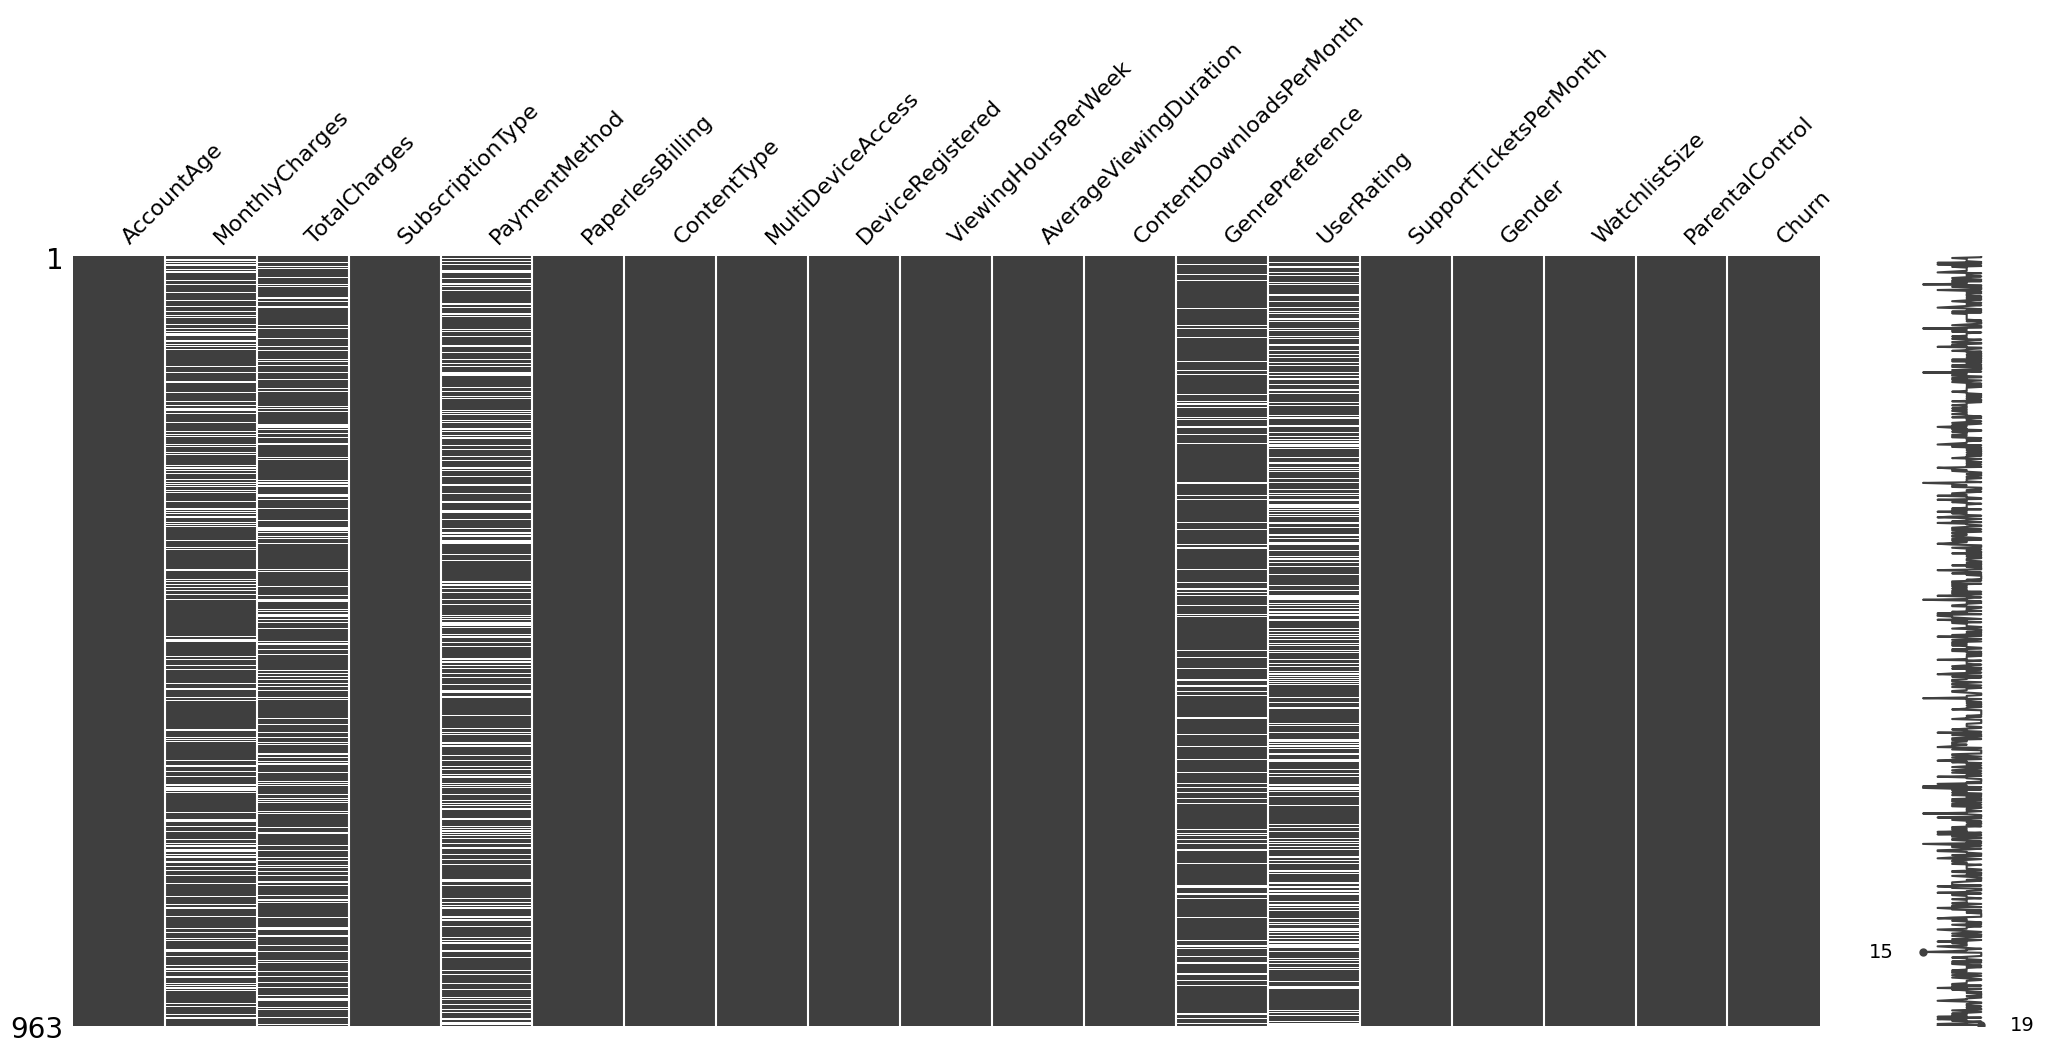

In [17]:
# Visualizamos los valores faltantes como una matriz
msno.matrix(df)

In [18]:
### Eliminaremos la columna de UserRating por la cantidad de faltantes
df = df.drop(columns=["UserRating"], axis=1, inplace=True)

#### One-Hot Encoding. Para seguir con las imputaciones necesitamos convertir las categorías en valores numéricos